In [1]:
from paddleocr import PaddleOCR, draw_ocr
import os,glob,csv,math,json,re,math,cv2,slideio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display, HTML
from fuzzywuzzy import fuzz
from utils import show_images
from tqdm import tqdm

In [2]:
# Open our folder and list the number of files inside
folder_name,type = 'A20-099','svs' # Specify the folder name (first param) and file type (second param)
folder = glob.glob(f"{folder_name}/*.{type}")
print(f"{len(folder)} {type} files identified.")

86 svs files identified.


In [3]:
file = [folder][0][1]
slide = slideio.open_slide(file)
scene = slide.get_scene(0)
image_names = slide.get_aux_image_names()
images = []

In [4]:
image_names

['Thumbnail', 'Label', 'Macro']

In [5]:
for name in image_names:
    if name == 'Label':
        image = slide.get_aux_image_raster(name)
        images.append(image)  
        rotated_image = np.rot90(image, k=-1) # Capture a rotated image of the label

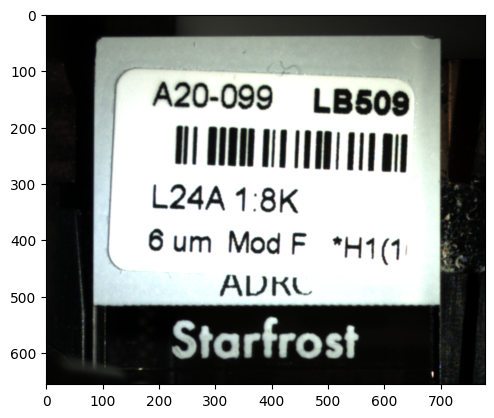

In [6]:
plt.imshow(rotated_image)
plt.show()

In [7]:
# Setup model
ocr_model = PaddleOCR(lang='en')

[2023/10/17 11:56:07] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/vii/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/vii/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_v

In [8]:
result = ocr_model.ocr(rotated_image)

[2023/10/17 11:56:08] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/10/17 11:56:08] ppocr DEBUG: dt_boxes num : 7, elapse : 0.2851698398590088
[2023/10/17 11:56:08] ppocr DEBUG: rec_res num  : 7, elapse : 0.40328121185302734


In [9]:
text_list = []
for result_group in result:
    for text_region in result_group:
        text, confidence = text_region[1]  # Extract text and confidence
        print("Text:", text)
        print("Confidence:", confidence)
        text_list.append(text)
        # Coordinates are stored in text_region[0] if needed

Text: A20-099
Confidence: 0.9993012547492981
Text: LB509
Confidence: 0.9911983609199524
Text: L24A 1:8K
Confidence: 0.999268114566803
Text: 6 um Mod F
Confidence: 0.9983429908752441
Text: *H1(1
Confidence: 0.9449912309646606
Text: ADRC
Confidence: 0.8298413753509521
Text: Starfrost
Confidence: 0.9768228530883789


In [10]:
text_list

['A20-099', 'LB509', 'L24A 1:8K', '6 um Mod F', '*H1(1', 'ADRC', 'Starfrost']